# Weather Dataset

The python script below was used to visualize the weather of 500+ cities across the world. The script generates a random combination of latitudes and longitudes to ensure that the cities are not repeated. Using the coordinates, a list of cities was pulled on 12/01/2020 from OpenWeatherMap API using a series of successive API calls. The list of cities was saved into a csv file as cities.csv. Lastly, 4 scatterplots were created to visualize the effect the distance from the equator has on the max temperature (F), humidity %, cloudiness %, and wind speed (mph) of these cities. 

In [5]:
# Import dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

# Import API Key
from api_keys import weather_api_key

# Determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding coordinates (latitude and longitud) and cities
coordinates = []
cities = []

# Create a set of random lat and long combinations
lat = np.random.uniform(lat_range[0], lat_range[1], size=1500)
long = np.random.uniform(long_range[0], long_range[1], size=1500)
coordinates = zip(lat, long)

# Identify nearest city for each lat, long combination
for lat_longs in coordinates:
    city = citipy.nearest_city(lat_longs[0], lat_longs[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

## Perform API Calls

In [7]:
#Lists and counters
new_cities = []
cloud = []
country = []
date = []
humidity = []
temp = []
lats = []
longs = []
wind = []
index_counter = 0
set_counter = 1

In [8]:
# Weather API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
url = f"{base_url}appid=1c1f0ef346b8b82d638f6bd65672e6dd&units={units}&q="
response = requests.get(url + city).json()
response

{'coord': {'lon': 115.33, 'lat': -33.65},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 55.2,
  'feels_like': 52.36,
  'temp_min': 52,
  'temp_max': 57,
  'pressure': 1021,
  'humidity': 75},
 'visibility': 10000,
 'wind': {'speed': 4, 'deg': 25, 'gust': 7},
 'clouds': {'all': 28},
 'dt': 1606863654,
 'sys': {'type': 3,
  'id': 2020551,
  'country': 'AU',
  'sunrise': 1606856490,
  'sunset': 1606907706},
 'timezone': 28800,
 'id': 2075265,
 'name': 'Busselton',
 'cod': 200}

In [9]:
print("Beginning Data Retrieval ")
print("-------------------------------")

# For loop matching city names with cities
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(url + city).json()
        new_cities.append(response["name"])
        cloud.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lats.append(response["coord"]["lat"])
        longs.append(response["coord"]["lon"])
        temp.append(response['main']['temp_max'])
        wind.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval 
-------------------------------
Processing Record 1 of Set 1 : kapaa
City not found. Skipping...
Processing Record 2 of Set 1 : desaguadero
Processing Record 3 of Set 1 : bredasdorp
Processing Record 4 of Set 1 : punta arenas
Processing Record 5 of Set 1 : port alfred
Processing Record 6 of Set 1 : cabo san lucas
Processing Record 7 of Set 1 : dikson
Processing Record 8 of Set 1 : kodiak
Processing Record 9 of Set 1 : bluff
Processing Record 10 of Set 1 : yellowknife
Processing Record 11 of Set 1 : vaini
Processing Record 12 of Set 1 : paamiut
Processing Record 13 of Set 1 : kloulklubed
Processing Record 14 of Set 1 : butaritari
Processing Record 15 of Set 1 : jamestown
Processing Record 16 of Set 1 : dhuri
Processing Record 17 of Set 1 : ingham
Processing Record 18 of Set 1 : barrow
Processing Record 19 of Set 1 : upernavik
Processing Record 20 of Set 1 : hasaki
Processing Record 21 of Set 1 : laibin
Processing Record 22 of Set 1 : tasiilaq
City not found. Sk

Processing Record 35 of Set 4 : puerto del rosario
Processing Record 36 of Set 4 : ansalta
Processing Record 37 of Set 4 : petropavlovsk-kamchatskiy
Processing Record 38 of Set 4 : pindiga
Processing Record 39 of Set 4 : murgab
Processing Record 40 of Set 4 : juruti
Processing Record 41 of Set 4 : tuatapere
Processing Record 42 of Set 4 : sagua la grande
Processing Record 43 of Set 4 : waingapu
Processing Record 44 of Set 4 : touros
City not found. Skipping...
Processing Record 45 of Set 4 : havre-saint-pierre
City not found. Skipping...
City not found. Skipping...
Processing Record 46 of Set 4 : mongo
Processing Record 47 of Set 4 : thompson
Processing Record 48 of Set 4 : hervey bay
Processing Record 49 of Set 4 : duluth
Processing Record 50 of Set 4 : saint-georges
Processing Record 0 of Set 5 : smirnykh
Processing Record 1 of Set 5 : hay river
Processing Record 2 of Set 5 : nemuro
Processing Record 3 of Set 5 : lakes entrance
Processing Record 4 of Set 5 : kijang
Processing Record 

Processing Record 22 of Set 8 : san policarpo
Processing Record 23 of Set 8 : chapayevka
Processing Record 24 of Set 8 : micheweni
City not found. Skipping...
Processing Record 25 of Set 8 : portsmouth
Processing Record 26 of Set 8 : jizan
Processing Record 27 of Set 8 : trelew
Processing Record 28 of Set 8 : quatre cocos
Processing Record 29 of Set 8 : ancud
Processing Record 30 of Set 8 : mahebourg
Processing Record 31 of Set 8 : ponta delgada
Processing Record 32 of Set 8 : lianran
Processing Record 33 of Set 8 : isabela
Processing Record 34 of Set 8 : ullapool
Processing Record 35 of Set 8 : waipawa
Processing Record 36 of Set 8 : pemangkat
Processing Record 37 of Set 8 : aklavik
Processing Record 38 of Set 8 : ucluelet
Processing Record 39 of Set 8 : kruisfontein
Processing Record 40 of Set 8 : northam
Processing Record 41 of Set 8 : anamur
Processing Record 42 of Set 8 : malanje
Processing Record 43 of Set 8 : chara
City not found. Skipping...
Processing Record 44 of Set 8 : path

In [11]:
#Create a dataframe using information from data retrieval
weather_dict = ({"City" : new_cities, 
                 "Lat" : lats, 
                 "Long" : longs, 
                 "Max Temp" : temp,                            
                 "Humidity" : humidity, 
                 "Clouds" : cloud, 
                 "Wind Speed" : wind, 
                 "Country" : country, 
                 "Date" : date
                 })

weather_data = pd.DataFrame(weather_dict)

In [13]:
# Inspect the data for outliers (cities with humidity over 100%)
weather_data.loc[weather_data['Humidity'] > 100]

,City,Lat,Long,Max Temp,Humidity,Clouds,Wind Speed,Country,Date


In [14]:
#Save weather data to a csv file
weather_data.to_csv("assets/images/cities.csv", index=False)

## Plotting the Data

### Scatter Plots

In [15]:
# Define a function for scatter plots

coord = weather_data.loc[pd.to_numeric(weather_data["Lat"]).astype(float) >= -90.0, :]

def scatter(x_axis, y_axis, x_label, y_label, title, ifig):
    plt.scatter(x_axis, y_axis, color = "yellow", edgecolor = "black")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(linestyle='-', linewidth=2, alpha=0.5)
    plt.title(title)
    plt.savefig(f"assets/images/fig{ifig}.png")
    plt.show()

#### Latitude vs. Temperature Plot

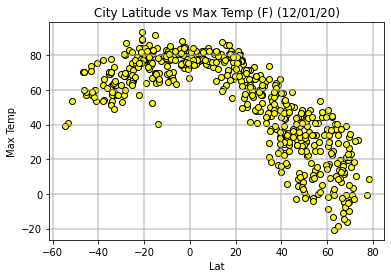

In [16]:
# Define variables and create plot using scatter function
x_label = "Lat"
y_label = "Max Temp"
title = (f"City Latitude vs Max Temp (F) (12/01/20)")
scatter(coord[x_label], coord[y_label], x_label, y_label, title, 1)

#### Latitude vs. Humidity Plot

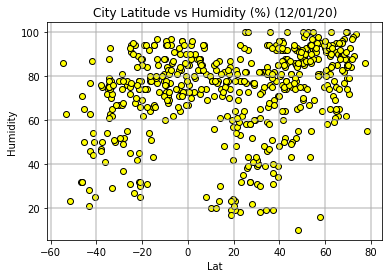

In [17]:
# Define variables and create plot using scatter function
x_label = "Lat"
y_label = "Humidity"
title = (f"City Latitude vs Humidity (%) (12/01/20)")
scatter(coord[x_label], coord[y_label], x_label, y_label, title, 2)

#### Latitude vs. Cloudiness Plot

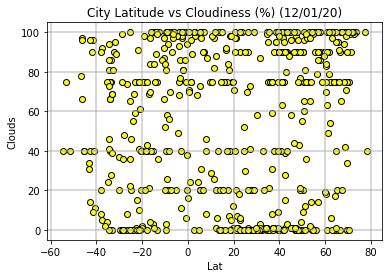

In [18]:
# Define variables and create plot using scatter function
x_label = "Lat"
y_label = "Clouds"
title = (f"City Latitude vs Cloudiness (%) (12/01/20)")
scatter(coord[x_label], coord[y_label], x_label, y_label, title, 3)

#### Latitude vs. Wind Speed Plot

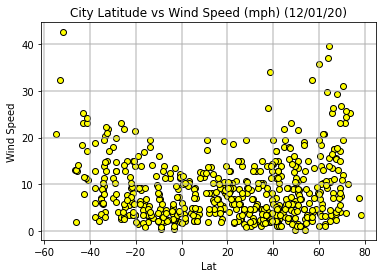

In [19]:
# Define variables and create plot using scatter function
x_label = "Lat"
y_label = "Wind Speed"
title = (f"City Latitude vs Wind Speed (mph) (12/01/20)")
scatter(coord[x_label], coord[y_label], x_label, y_label, title, 4)